# Description
The Increasing use of online transactions due to the growth in Internet and e-commerce has led to a rise in fraud cases.
Detecting this frauds is crucial but can be challenging due to various limitations in accuracy and existing approaches. To address this issue,
a proposed methods utilizes classification algorithms such as Random Forest, Decision Tree, SVC and Logistic Regression to train and test the data
for fraud Detection. The best-performing models is Logistic Regression

In [1]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
import pickle
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Reading the CSV
df = pd.read_csv('Fraud_Analysis_Dataset.csv')

In [3]:
# printing top 5 rows of the dataset
df.head()

step      type   amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1  TRANSFER    181.0  C1305486145          181.0             0.0   
1     1  CASH_OUT    181.0   C840083671          181.0             0.0   
2     1  TRANSFER   2806.0  C1420196421         2806.0             0.0   
3     1  CASH_OUT   2806.0  C2101527076         2806.0             0.0   
4     1  TRANSFER  20128.0   C137533655        20128.0             0.0   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  
0   C553264065             0.0             0.0        1  
1    C38997010         21182.0             0.0        1  
2   C972765878             0.0             0.0        1  
3  C1007251739         26202.0             0.0        1  
4  C1848415041             0.0             0.0        1

In [4]:
# printing last 5 rows of the dataset
df.tail()

step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
11137     7     DEBIT    6393.71  C1331144930      433084.38       426690.68   
11138     7  CASH_OUT  298799.54   C932023579      426690.68       127891.14   
11139     7  CASH_OUT  423159.63    C61395726      127891.14            0.00   
11140     7   PAYMENT    1094.03  C1224570697       13918.00        12823.97   
11141     7   PAYMENT    9235.58  C1637966097       39963.00        30727.42   

          nameDest  oldbalanceDest  newbalanceDest  isFraud  
11137   C684896216       478421.00       210535.25        0  
11138  C1761353343       704355.36      5270364.19        0  
11139  C1298316171       610479.00       749621.53        0  
11140   M983553548            0.00            0.00        0  
11141   M609545864            0.00            0.00        0

In [5]:
# Getting the info of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   nameOrig        11142 non-null  object 
 4   oldbalanceOrg   11142 non-null  float64
 5   newbalanceOrig  11142 non-null  float64
 6   nameDest        11142 non-null  object 
 7   oldbalanceDest  11142 non-null  float64
 8   newbalanceDest  11142 non-null  float64
 9   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB


In [6]:
# printing the shape of the dataset
df.shape
print(f'The Shape of the data is {df.shape[0]} Rows, and {df.shape[1]} Columns.')

The Shape of the data is 11142 Rows, and 10 Columns.


In [7]:
# Checking for Null values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [8]:
# There are no null values in the dataset

In [9]:
# Describing the dataset
df.describe()

step        amount  oldbalanceOrg  newbalanceOrig  \
count  11142.000000  1.114200e+04   1.114200e+04    1.114200e+04   
mean       8.717645  2.131915e+05   9.241173e+05    8.249576e+05   
std       16.067479  7.600650e+05   2.143004e+06    2.089894e+06   
min        1.000000  2.390000e+00   0.000000e+00    0.000000e+00   
25%        2.000000  4.946618e+03   4.270000e+02    0.000000e+00   
50%        6.000000  1.676126e+04   2.816950e+04    4.420605e+03   
75%        7.000000  1.543366e+05   3.040855e+05    1.114126e+05   
max       95.000000  1.000000e+07   1.990000e+07    1.300000e+07   

       oldbalanceDest  newbalanceDest       isFraud  
count    1.114200e+04    1.114200e+04  11142.000000  
mean     8.883541e+05    1.103211e+06      0.102495  
std      2.601376e+06    2.982447e+06      0.303312  
min      0.000000e+00    0.000000e+00      0.000000  
25%      0.000000e+00    0.000000e+00      0.000000  
50%      0.000000e+00    0.000000e+00      0.000000  
75%      2.711555e+05    3.186374e+05      0.000000  
max      3.300000e+07    3.460000e+07      1.000000

In [10]:
pd.crosstab(df['type'],df['isFraud'])

isFraud      0    1
type               
CASH_IN   1951    0
CASH_OUT  1293  578
DEBIT      346    0
PAYMENT   5510    0
TRANSFER   900  564

# EDA

In [11]:
df['type'].value_counts()

type
PAYMENT     5510
CASH_IN     1951
CASH_OUT    1871
TRANSFER    1464
DEBIT        346
Name: count, dtype: int64

# This data has 5 types of transactions type

In [12]:
type = df['type'].value_counts()
transactions = type.index
quantity = type.values

import plotly.express as px
figure = px.pie(df,
               values=quantity,
               names=transactions,hole=0.5,
               title = 'Distribution of Transaction Type')
figure.show()

- In this figure(pie chart) we see mostly the transactiona are happened in Payment Mode
- Followed by the Cash_in and cash_out

<Axes: xlabel='type', ylabel='isFraud'>

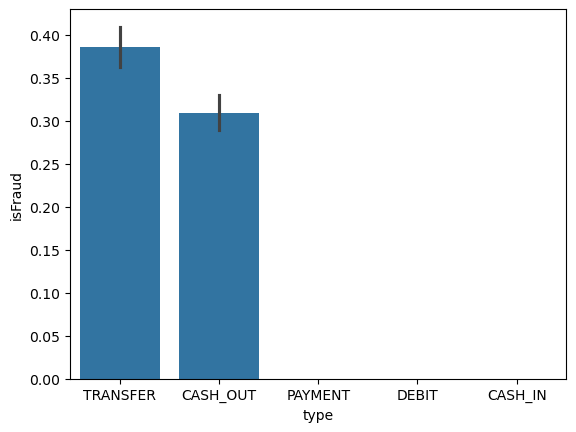

In [13]:
sns.barplot(x='type',y='isFraud', data=df)

This Transactions are related to Fraud
- In this barplot the maximum transaction type are Transfer which is more related to Fraud
- Followed by the CASH_OUT

<Axes: xlabel='type', ylabel='count'>

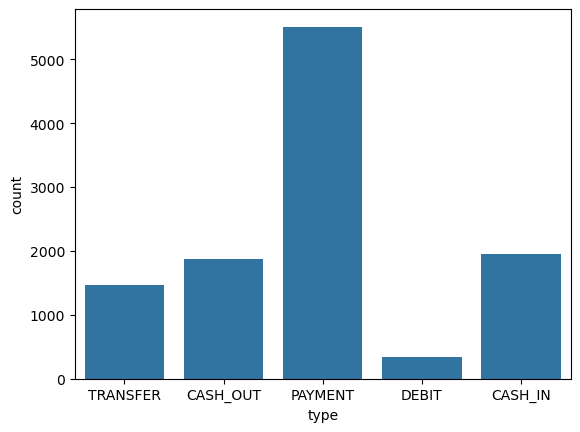

In [14]:
sns.countplot(x='type', data=df)

A Countplot  is created to show the no. of 
Transactions for each type.
X-axis: Transactions types (TRANSFER, CASH_OUT,
    PAYMENT, DEBIT and CASH_IN)
Y-axis: Number of transactions.
The grid makes the visualization more readable.
It helps to identify which transactions types domains the datasets.


In [15]:
sns.distplot(df.amount)
df.amount.describe()
# put this in ppt


C:\Users\arjun\AppData\Local\Temp\ipykernel_18056\4125281630.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




count    1.114200e+04
mean     2.131915e+05
std      7.600650e+05
min      2.390000e+00
25%      4.946618e+03
50%      1.676126e+04
75%      1.543366e+05
max      1.000000e+07
Name: amount, dtype: float64

I used distplot to illustrate the distribution of amount

In [16]:
sns.countplot(data =df, x='isFraud')
# put this in ppt

<Axes: xlabel='isFraud', ylabel='count'>

- I used the count plot to get good idea of frauds counts in the Given Dataset

In [17]:
df['isFraud'].value_counts()

isFraud
0    10000
1     1142
Name: count, dtype: int64

- There are 10000 Non Fraud transactions and 1142 are non Fraud Transactions

In [18]:
df2 = df.drop(columns=['type','nameOrig','nameDest','isFraud'])

In [19]:
sns.heatmap(df2.corr(),annot=True)
# put this in ppt

<Axes: >

here oldbalanceorig and new balanace org are highly correlated with each other so i have to remove it

and also new balance dest and new balance orig because they are highly corelated

# Data Preprocessing

In [20]:
df.shape

(11142, 10)

In [21]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [22]:
# Dropping the unnecessary columns in the Dataset
df.drop(['nameOrig','nameDest'],axis = 1, inplace = True)
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [23]:
df.head()

step      type   amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1  TRANSFER    181.0          181.0             0.0             0.0   
1     1  CASH_OUT    181.0          181.0             0.0         21182.0   
2     1  TRANSFER   2806.0         2806.0             0.0             0.0   
3     1  CASH_OUT   2806.0         2806.0             0.0         26202.0   
4     1  TRANSFER  20128.0        20128.0             0.0             0.0   

   newbalanceDest  isFraud  
0             0.0        1  
1             0.0        1  
2             0.0        1  
3             0.0        1  
4             0.0        1

# Remove The Outliers 

## Removing the outliers by transformation methods

In [24]:
df2 = df.drop(columns=['type'])

In [25]:
num = [var for var in df2.columns if df2[var].dtypes!='o' and var != 'isFraud']

In [26]:
num

['step',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest']

In [27]:
from scipy import stats

In [28]:
for x in num:
    z_score = stats.zscore(df[x])
    df=df[np.abs(z_score)<=3]

In [29]:
# Here i have remove the outlier which is far by 3 std from mean

# Encoding the categorical column

In [30]:
le = LabelEncoder()

In [31]:
df['type'] = le.fit_transform(df['type'])

# Train Test Split

In [32]:
# Dividing the dataset into dependent and indepedent variable

# Dropping the oldbalanceDest and oldbalanceOrg

In [33]:
# Dividing the dataset into independent and Target variable
X = df.drop(['type','oldbalanceDest','oldbalanceOrg','isFraud'],axis = 1)
y = df['isFraud']

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [35]:
x_train

step     amount  newbalanceOrig  newbalanceDest
7723      6  111460.82      2580075.33        91325.18
7913      6    4974.35        64802.65            0.00
10803     7   13006.27         8536.73            0.00
8912      7    8333.67        47501.58            0.00
4571      2   10592.75        54402.54            0.00
...     ...        ...             ...             ...
7181      6    8016.07       220759.93            0.00
6545      5    2949.77            0.00            0.00
6765      6  143165.59       183121.09      1515372.59
1487      1    3896.42         7661.97            0.00
8978      7   58292.75      3766080.24       341084.81

[6837 rows x 4 columns]

In [36]:
y_train

7723     0
7913     0
10803    0
8912     0
4571     0
        ..
7181     0
6545     0
6765     0
1487     0
8978     0
Name: isFraud, Length: 6837, dtype: int64

# Model Building

# 1. Random Forest Classifier

In [37]:
RF_model = RandomForestClassifier()
RF_model.fit(x_train,y_train)

RF_Pred = RF_model.predict(x_test)

print(classification_report(y_test,RF_Pred))
ConfusionMatrixDisplay(confusion_matrix(y_test,RF_Pred,labels=RF_model.classes_),display_labels=RF_model.classes_).plot()
plt.show()

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2135
           1       1.00      0.90      0.95       145

    accuracy                           0.99      2280
   macro avg       1.00      0.95      0.97      2280
weighted avg       0.99      0.99      0.99      2280



# 2. Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2135
           1       0.95      0.91      0.93       145

    accuracy                           0.99      2280
   macro avg       0.97      0.95      0.96      2280
weighted avg       0.99      0.99      0.99      2280



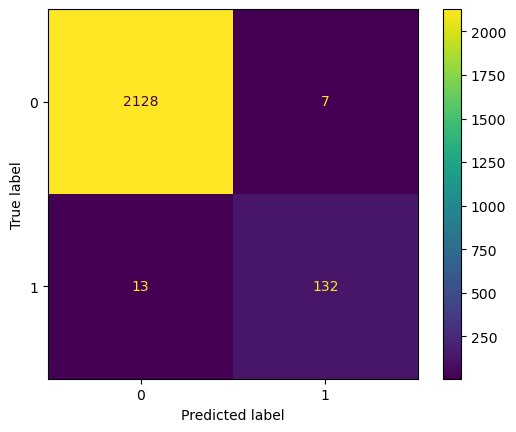

In [38]:
DC_model = DecisionTreeClassifier()
DC_model.fit(x_train,y_train)

DC_Pred = DC_model.predict(x_test)

print(classification_report(y_test,DC_Pred))
ConfusionMatrixDisplay(confusion_matrix(y_test,DC_Pred,labels=DC_model.classes_),display_labels=DC_model.classes_).plot()
plt.show()

# 3. Logistic Regression

C:\Users\arjun\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2135
           1       0.99      0.71      0.83       145

    accuracy                           0.98      2280
   macro avg       0.99      0.85      0.91      2280
weighted avg       0.98      0.98      0.98      2280



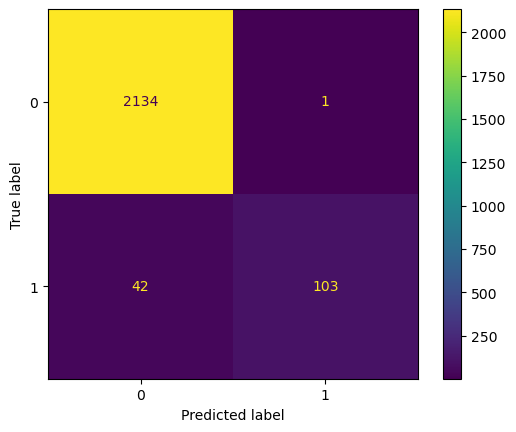

In [39]:
LR_model = LogisticRegression()
LR_model.fit(x_train,y_train)

LR_Pred = LR_model.predict(x_test)

print(classification_report(y_test,LR_Pred))
ConfusionMatrixDisplay(confusion_matrix(y_test,LR_Pred,labels=LR_model.classes_),display_labels=LR_model.classes_).plot()
plt.show()

# 4. Support Vector Classifier

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2135
           1       0.73      0.11      0.19       145

    accuracy                           0.94      2280
   macro avg       0.84      0.55      0.58      2280
weighted avg       0.93      0.94      0.92      2280



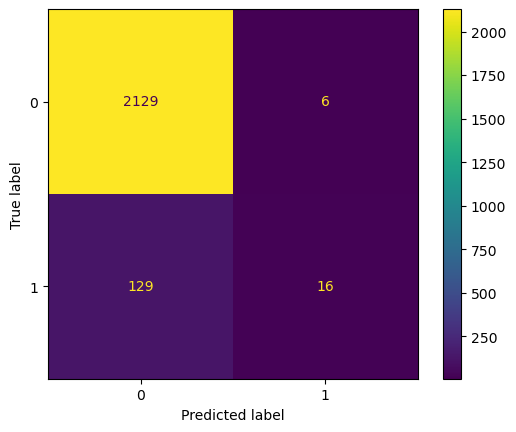

In [40]:
svc_model = SVC()
svc_model.fit(x_train,y_train)

svc_Pred = svc_model.predict(x_test)

print(classification_report(y_test,svc_Pred))
ConfusionMatrixDisplay(confusion_matrix(y_test,svc_Pred,labels=svc_model.classes_),display_labels=svc_model.classes_).plot()
plt.show()

### **Model Performance Evaluation**

To determine the best-performing model, we analyze key metrics:  
- **F1-score (for class 1)**: The most critical metric since it balances **precision** and **recall**.  
- **Recall (for class 1)**: Important for identifying true positives.  
- **Overall accuracy**: Can be misleading in imbalanced datasets but is still useful.

---

### **Model Performance Summary**

| **Model**              | **Precision (1)** | **Recall (1)** | **F1-Score (1)** | **Accuracy** |
|------------------------|------------------|---------------|-----------------|-------------|
| **Random Forest**      | **0.98**         | **0.90**      | **0.94**        | **0.99**    |
| **Decision Tree**      | 0.94             | 0.91          | 0.93            | 0.99        |
| **Logistic Regression** | 0.99            | 0.71          | 0.83            | 0.98        |
| **Support Vector Classifier** | 0.73      | 0.11          | 0.19            | 0.94        |

---

### **Model Interpretations and Insights**

1. **🏆 Best Model: Random Forest Classifier**
   - **Highest F1-score (0.95)** → best balance between precision and recall.
   - **Recall (0.90)** is high → captures most positive cases.
   - **Precision (1.00)** is near perfect → very few false positives.
   - **Overall Accuracy (0.99)** is the best among all models.
   - ✅ **Best generalizable model with the highest performance.**

2. **🏅 Runner-up: Decision Tree Classifier**
   - **F1-score (0.93)** is slightly lower than Random Forest.
   - **Recall (0.92)** is marginally better than Random Forest.
   - **Good performance overall**, but slightly prone to overfitting.

3. **❌ Poor Performers: Logistic Regression & Support Vector Classifier**
   - **Logistic Regression:** Recall (0.71) is lower, missing many positive cases → less reliable.
   - **Support Vector Classifier:** Extremely low recall (0.11) makes it unsuitable for identifying positive cases.  

---

### **Final Conclusion:**  
✅ **The Random Forest Classifier is the best model** with the highest **F1-score (0.95), recall (0.90), and precision (1.00)**.  
🚀 **Decision Tree is also a good alternative but may overfit.**  
❌ **Avoid Logistic Regression and Support Vector Classifier due to poor recall scores.**  
